# Machine Learning Project 01
### Objectives

1. Predicting Heart-disease
2. Inorm decision-making of Cardiologist

### Model in action
1. Model can Inform but should not make decision
2. Especially important in healthcare

### Patient ---> HeartDisease / No HeartDisease

### steps:
1. Problem Understanding
2. Data Collection and Preperation
3. Feature Engineering
4. Data Modelling
5. Model Training
6. Model Evaluation
7. Model Deployment
8. Model Monitoring

### What you will expect while using the system
1. How accurate? ---> Accuracy
2. Is the system Reliable? ---> Reliability
3. How secure the system is? ---> Security
4. Does the system interpret the result well? ---> Interpretibility


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #missing value
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy.stats import chi2_contingency

from sklearn.ensemble import ExtraTreesClassifier #feature selection
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv")

In [3]:
df.shape

(319795, 18)

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data Cleaning

In [5]:
df.duplicated().sum()

18078

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No null values

In [9]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [10]:
df['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

In [11]:
df['Diabetic'].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

# Data Encoding

In [12]:
df = df[df.columns].replace({
'Yes':1, 'No':0, 'Male':1, 'Female':0, 'No, borderline diabetes':0, 'Yes (during pregnancy)':1}
)

In [13]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [14]:
df['Diabetic'].value_counts()

Diabetic
0    258572
1     43145
Name: count, dtype: int64

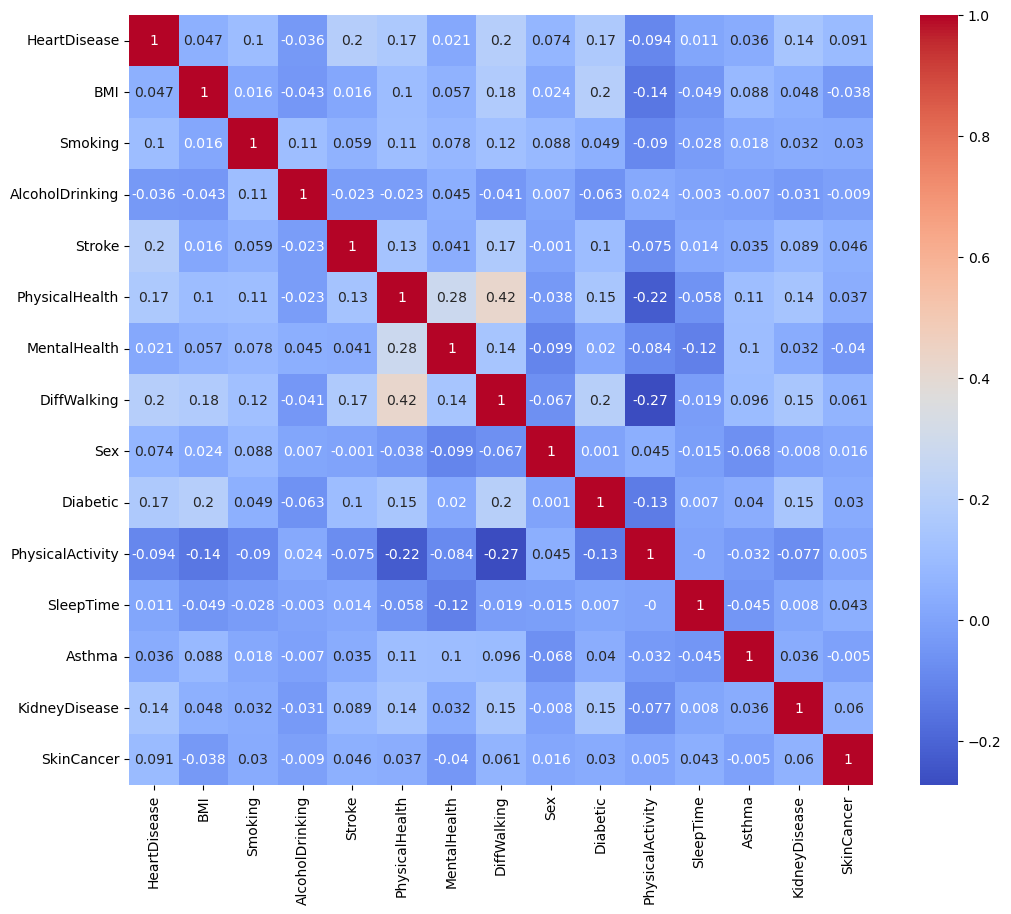

In [15]:
new_df=df.drop(columns =['AgeCategory', 'Race', 'GenHealth'])
corr = new_df.corr().round(3)

plt.figure(figsize = (12,10))
sns.heatmap(corr,annot = True,cmap='coolwarm')
plt.show()

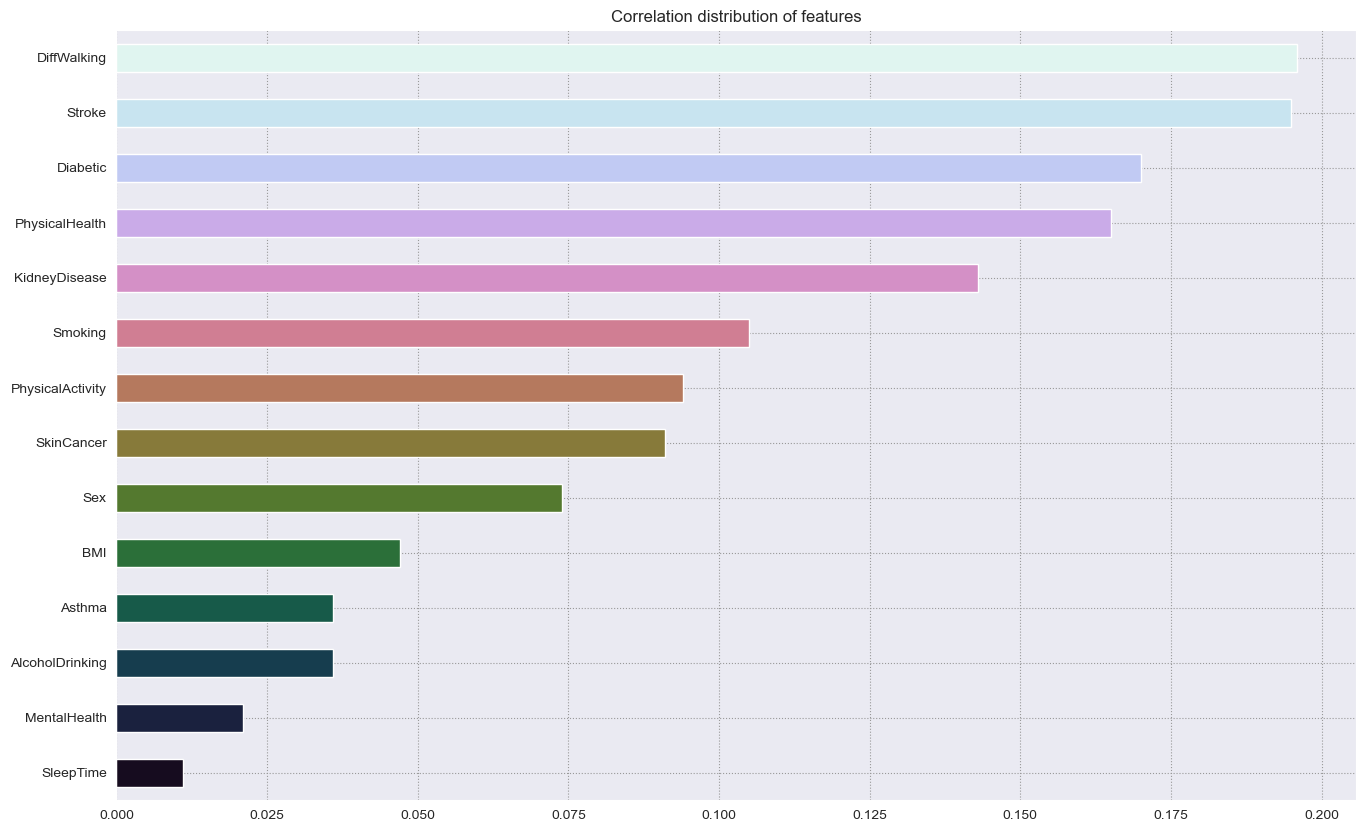

In [16]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


plt.figure(figsize=(16,10))
plt.title('Correlation distribution of features')

corr_values = abs(corr['HeartDisease']).sort_values()[:-1]
bar_colors = sns.color_palette("cubehelix", len(corr_values))  
corr_values.plot.barh(color=bar_colors) 

plt.show()


# Statistical Analysis

In [17]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [18]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [19]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               2
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [20]:
categorical_vars = []
continuous_vars = []

for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values <= 6:
        categorical_vars.append(col)
    else:
        continuous_vars.append(col)

In [21]:
categorical_vars

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [22]:
continuous_vars

['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']

In [23]:
from scipy.stats import chi2_contingency

In [24]:
p_values = {}
for variable in categorical_vars:
    contingency_table = pd.crosstab(df['HeartDisease'], df[variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[variable] = p


print("P-values for chi-squared test against HeartDisease:")
for variable, p_value in p_values.items():
    print(f"{variable}: {p_value}")

P-values for chi-squared test against HeartDisease:
HeartDisease: 0.0
Smoking: 0.0
AlcoholDrinking: 2.699812521029966e-88
Stroke: 0.0
DiffWalking: 0.0
Sex: 0.0
Race: 1.866553483860569e-220
Diabetic: 0.0
PhysicalActivity: 0.0
GenHealth: 0.0
Asthma: 6.196831449538099e-86
KidneyDisease: 0.0
SkinCancer: 0.0


In [25]:
significant_categorical = []
for column in categorical_vars:
    contingency_table = pd.crosstab(df[column], df['HeartDisease'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.05:  
        significant_categorical.append(column)
    print(f"Chi-squared p-value for '{column}': {p}")

print("\nStatistically significant categorical features:")
print(significant_categorical)


Chi-squared p-value for 'HeartDisease': 0.0
Chi-squared p-value for 'Smoking': 0.0
Chi-squared p-value for 'AlcoholDrinking': 2.699812521029966e-88
Chi-squared p-value for 'Stroke': 0.0
Chi-squared p-value for 'DiffWalking': 0.0
Chi-squared p-value for 'Sex': 0.0
Chi-squared p-value for 'Race': 1.866553483860569e-220
Chi-squared p-value for 'Diabetic': 0.0
Chi-squared p-value for 'PhysicalActivity': 0.0
Chi-squared p-value for 'GenHealth': 0.0
Chi-squared p-value for 'Asthma': 6.196831449538099e-86
Chi-squared p-value for 'KidneyDisease': 0.0
Chi-squared p-value for 'SkinCancer': 0.0

Statistically significant categorical features:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [26]:
from sklearn.preprocessing import LabelEncoder
continuous_vars_with_string = ['AgeCategory', 'GenHealth','Race']
label_encoder = LabelEncoder()
for var in continuous_vars_with_string:
    df[var] = label_encoder.fit_transform(df[var])

All the p_values shows the categorical variable columns are statistically significant

In [27]:
p_values_continuous = {}
from scipy.stats import ttest_ind
for var in continuous_vars:
    heart_disease_present = df[df['HeartDisease'] == 1][var]
    heart_disease_absent = df[df['HeartDisease'] == 0][var]
    t_stat, p_value = ttest_ind(heart_disease_present, heart_disease_absent)
    p_values_continuous[var] = p_value
    
print("P-values for t-test against HeartDisease (continuous variables):")
for var, p_value in p_values_continuous.items():
    print(f"{var}: {p_value}")

P-values for t-test against HeartDisease (continuous variables):
BMI: 9.813567353762623e-149
PhysicalHealth: 0.0
MentalHealth: 1.508599734023503e-30
AgeCategory: 0.0
SleepTime: 2.6659441443053947e-09


P_values show we have all continous data to be statistically significant

In [28]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [29]:
feat_select = ExtraTreesClassifier()
feat_select.fit(X,y)

ExtraTreesClassifier()

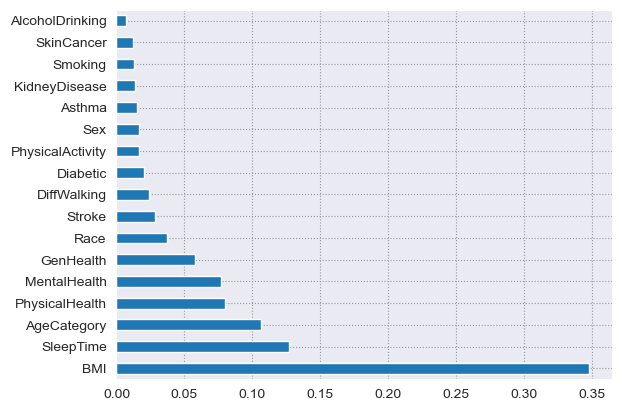

In [30]:
feat_imp = pd.Series(feat_select.feature_importances_, index = X.columns)
feat_imp.nlargest(len(df.columns)).plot(kind='barh')
plt.show()

In [31]:
feat_imp.sort_values(ascending = False)

BMI                 0.347724
SleepTime           0.127112
AgeCategory         0.106653
PhysicalHealth      0.080210
MentalHealth        0.076728
GenHealth           0.057452
Race                0.037355
Stroke              0.028211
DiffWalking         0.023891
Diabetic            0.020489
PhysicalActivity    0.016596
Sex                 0.016441
Asthma              0.015471
KidneyDisease       0.013390
Smoking             0.013044
SkinCancer          0.011909
AlcoholDrinking     0.007323
dtype: float64

In [32]:
X = df[feat_imp[:6].index]


In [33]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth
0,16.60,1,0,0,3.0,30.0
1,20.34,0,0,1,0.0,0.0
2,26.58,1,0,0,20.0,30.0
3,24.21,0,0,0,0.0,0.0
4,23.71,0,0,0,28.0,0.0
...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0
319791,29.84,1,0,0,0.0,0.0
319792,24.24,0,0,0,0.0,0.0
319793,32.81,0,0,0,0.0,0.0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle = True, test_size = 0.25,random_state = 42)

# Data Preprocessing

In [35]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth
0,16.60,1,0,0,3.0,30.0
1,20.34,0,0,1,0.0,0.0
2,26.58,1,0,0,20.0,30.0
3,24.21,0,0,0,0.0,0.0
4,23.71,0,0,0,28.0,0.0
...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0
319791,29.84,1,0,0,0.0,0.0
319792,24.24,0,0,0,0.0,0.0
319793,32.81,0,0,0,0.0,0.0


In [36]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int32
Race                  int32
Diabetic              int64
PhysicalActivity      int64
GenHealth             int32
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [37]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth
130672,26.00,0,0,0,0.0,1.0
279739,27.89,1,0,0,0.0,0.0
280861,17.75,0,0,0,2.0,10.0
204920,20.41,0,0,0,2.0,2.0
293615,28.19,0,0,0,0.0,0.0
...,...,...,...,...,...,...
123014,27.57,0,0,0,0.0,0.0
273086,17.97,1,0,0,0.0,25.0
135728,28.34,0,0,0,9.0,20.0
151731,22.43,1,0,0,5.0,30.0


In [38]:

X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth
130672,26.00,0,0,0,0.0,1.0
279739,27.89,1,0,0,0.0,0.0
280861,17.75,0,0,0,2.0,10.0
204920,20.41,0,0,0,2.0,2.0
293615,28.19,0,0,0,0.0,0.0
...,...,...,...,...,...,...
123014,27.57,0,0,0,0.0,0.0
273086,17.97,1,0,0,0.0,25.0
135728,28.34,0,0,0,9.0,20.0
151731,22.43,1,0,0,5.0,30.0


In [39]:
X_train.shape

(226287, 6)

In [40]:
def model_evaluation(estimator, x_test, y_test):
    from sklearn import metrics
    y_pred = estimator.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    # AUC (Area Under the Curve)
    y_pred_proba = estimator.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)
    return {'accuracy': acc, 'precision': prec, 'recall':rec, 'f1_score': f1, 'kappa':kappa,
           'fpr':fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [41]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_eval = model_evaluation(knn, X_test, y_test)
print('Accuracy: ', knn_eval['accuracy'])
print('Precision: ', knn_eval['precision'])
print('Recall: ', knn_eval['recall'])
print('f1_score', knn_eval['f1_score'])
print('Cohens Kappa Score: ', knn_eval['kappa'])
print('Area Under Curve: ', knn_eval['auc'])

Accuracy:  0.9025321490123294
Precision:  0.2857142857142857
Recall:  0.05379979420843745
f1_score 0.09054923305294409
Cohens Kappa Score:  0.06378944198087833
Area Under Curve:  0.5908176775855691


In [42]:
y_pred = knn.predict(X_test)


In [43]:
confusion_matrix = knn_eval['cm']

In [44]:
confusion_matrix

array([[67712,   915],
       [ 6437,   366]], dtype=int64)

In [45]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train, y_train)
clf_eval = model_evaluation(DT, X_test, y_test)
print('Accuracy: ', clf_eval['accuracy'])
print('Precision: ', clf_eval['precision'])
print('Recall: ', clf_eval['recall'])
print('f1_score', clf_eval['f1_score'])
print('Cohens Kappa Score: ', clf_eval['kappa'])
print('Area Under Curve: ', clf_eval['auc'])

Accuracy:  0.8874320562110566
Precision:  0.2165883143049026
Recall:  0.09481111274437748
f1_score 0.13188835497392903
Cohens Kappa Score:  0.08144143637038492
Area Under Curve:  0.5495271889489817


In [46]:
y_pred = DT.predict(X_test)
confusion_matrix = clf_eval['cm']
confusion_matrix

array([[66294,  2333],
       [ 6158,   645]], dtype=int64)

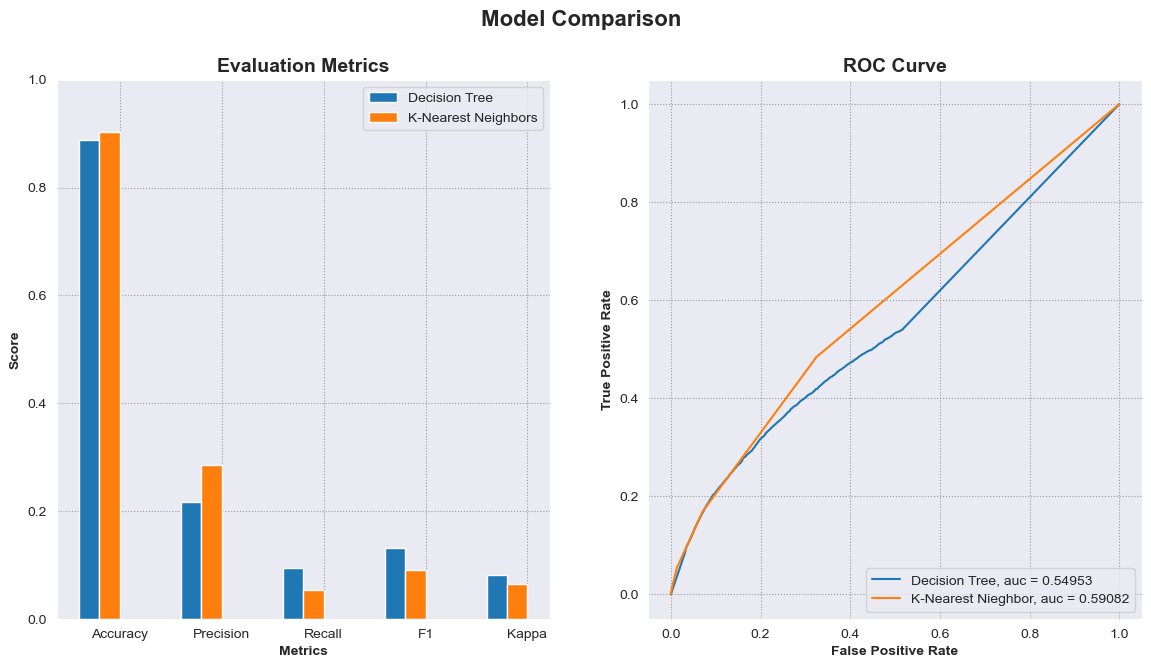

In [47]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['accuracy'], clf_eval['precision'], clf_eval['recall'], clf_eval['f1_score'], clf_eval['kappa']]
knn_score = [knn_eval['accuracy'], knn_eval['precision'], knn_eval['recall'], knn_eval['f1_score'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score

In [49]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_eval = model_evaluation(random_forest, X_test, y_test)
print('Random Forest:')
print('Accuracy: ', random_forest_eval['accuracy'])
print('Precision: ', random_forest_eval['precision'])
print('Recall: ', random_forest_eval['recall'])
print('F1 Score:', random_forest_eval['f1_score'])
print('Cohen\'s Kappa Score: ', random_forest_eval['kappa'])
print('Area Under Curve: ', random_forest_eval['auc'])
print()


Random Forest:
Accuracy:  0.8913694816386053
Precision:  0.2296929654100272
Recall:  0.08687343818903424
F1 Score: 0.12606655290102387
Cohen's Kappa Score:  0.08055360556735836
Area Under Curve:  0.6106556298975558



In [50]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_eval = model_evaluation(logistic_regression, X_test, y_test)
print('Logistic Regression:')
print('Accuracy: ', logistic_regression_eval['accuracy'])
print('Precision: ', logistic_regression_eval['precision'])
print('Recall: ', logistic_regression_eval['recall'])
print('F1 Score:', logistic_regression_eval['f1_score'])
print('Cohen\'s Kappa Score: ', logistic_regression_eval['kappa'])
print('Area Under Curve: ', logistic_regression_eval['auc'])
print()

Logistic Regression:
Accuracy:  0.9096911043351452
Precision:  0.492091388400703
Recall:  0.041158312509187125
F1 Score: 0.07596310363537712
Cohen's Kappa Score:  0.06291667909383591
Area Under Curve:  0.6959005968950882



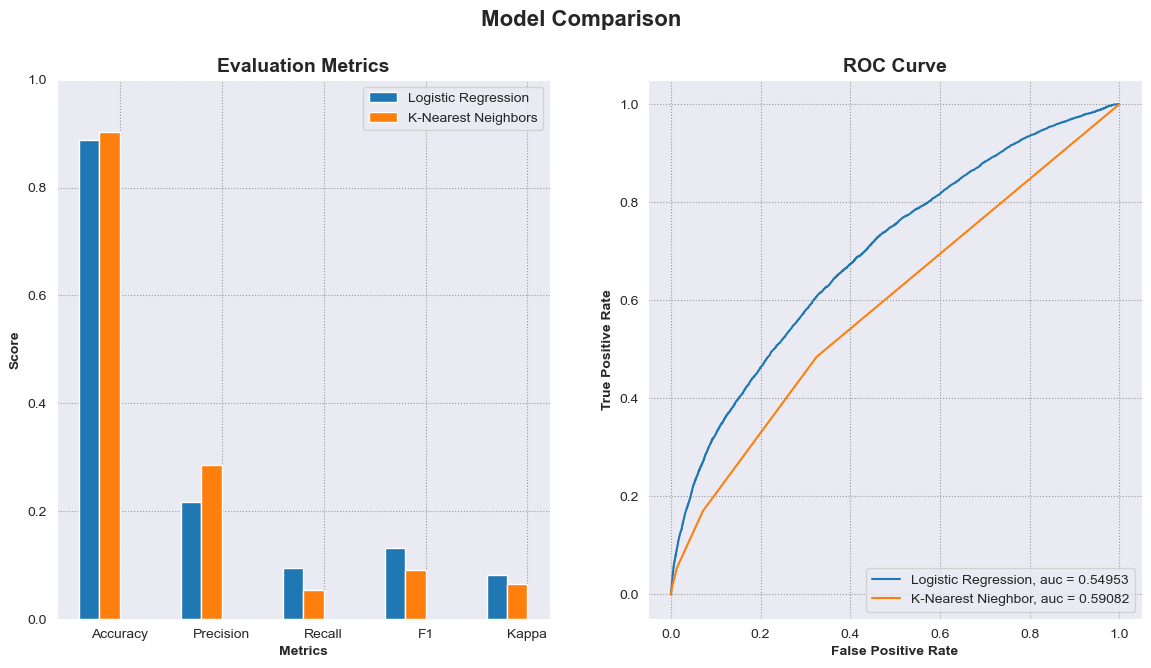

In [51]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
logistic_regression_score = [logistic_regression_eval['accuracy'],logistic_regression_eval['precision'],logistic_regression_eval['recall'], logistic_regression_eval['f1_score'], logistic_regression_eval['kappa']]
knn_score = [knn_eval['accuracy'], knn_eval['precision'], knn_eval['recall'], knn_eval['f1_score'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(logistic_regression_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(logistic_regression_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(logistic_regression_eval['fpr'], logistic_regression_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()